In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [4]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [5]:
# Save the input and target variables

print(diabetes.keys())

data = diabetes['data']
target = diabetes['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [9]:
# Normalise the target data (this will make clearer training curves)

target = (target - target.mean(axis =0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [10]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [18]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation= 'relu', input_shape= (train_data.shape[1],)),
        Dense(128, activation= 'relu'),
        Dense(128, activation= 'relu'),
        Dense(128, activation= 'relu'),
        Dense(128, activation= 'relu'),
        Dense(128, activation= 'relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [19]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [20]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])

In [21]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [22]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target, verbose = False)

[0.6677125692367554, 0.5985666]

#### Plot the learning curves

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

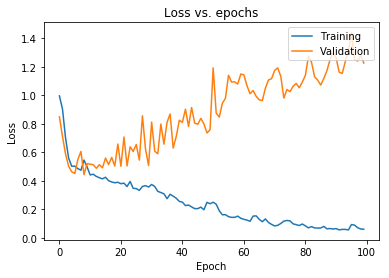

In [24]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [25]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [27]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [30]:
# Re-build the model with weight decay(l2) and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [31]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [32]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [33]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target, verbose=False)

[0.39339527553982206, 0.5112226]

#### Plot the learning curves

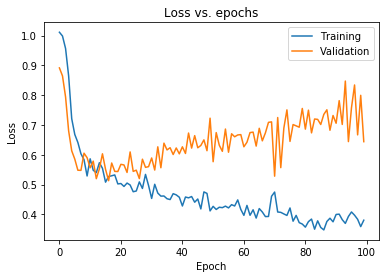

In [34]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [50]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs= None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f'Starting Epoch {epoch}')
        
    def on_train_batch_beging(self, batch, logs=None):
        print(f'Training: Starting Batch {batch}')
        
    def on_train_batch_end(self, batch, logs=None):
        print(f'Training: Finished Batch {batch}')
        
    def on_epoch_end(self, epoch, logs= None):
        print(f'Finished Epoch {epoch}')
        
    def on_train_end(self, logs=None):
        print('Finished training!')

        
class TestingCallback(Callback):
    
    ## no epoch in testing! ##
    
    def on_test_begin(self, logs= None):
        print("Starting testing...")
        
    '''
    def on_epoch_begin(self, epoch, logs=None):
        print(f'Starting Epoch {epoch}')
    '''    
    def on_test_batch_beging(self, batch, logs=None):
        print(f'Testing: Starting Batch {batch}')
        
    def on_test_batch_end(self, batch, logs=None):
        print(f'Testing: Finished Batch {batch}')
        
    ''' 
    def on_epoch_end(self, epoch, logs= None):
        print(f'Finished Epoch {epoch}')
    '''     
    def on_test_end(self, logs=None):
        print('Finished testing!')


class PredictionCallback(Callback):
    
    ## no epoch in prediction! ##
    
    def on_prediction_begin(self, logs= None):
        print("Starting Prediction...")
   
    def on_prediction_batch_beging(self, batch, logs=None):
        print(f'Predicting: Starting Batch {batch}')
        
    def on_prediction_batch_end(self, batch, logs=None):
        print(f'Predicting: Finished Batch {batch}')
    
    def on_prediction_end(self, logs=None):
        print('Finished prediction!')

In [36]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [37]:
# Compile the model

model.compile(optimizer= 'adam', loss= 'mse')

#### Train the model with the callback

In [39]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_target, epochs=3, batch_size=128, callbacks=[TrainingCallback()], verbose= False)

Starting training...
Starting Epoch 0
Training: Finished Batch 0
Training: Finished Batch 1
Training: Finished Batch 2
Training: Finished Batch 3
Finished Epoch 0
Starting Epoch 1
Training: Finished Batch 0
Training: Finished Batch 1
Training: Finished Batch 2
Training: Finished Batch 3
Finished Epoch 1
Starting Epoch 2
Training: Finished Batch 0
Training: Finished Batch 1
Training: Finished Batch 2
Training: Finished Batch 3
Finished Epoch 2
Finished training!


In [42]:
# Evaluate the model

model.evaluate(test_data, test_target, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Finished Batch 0
Testing: Finished Batch 1
Finished testing!


0.7842564053005643

In [51]:
# Make predictions with the model

model.predict(test_data, verbose= False, callbacks=[PredictionCallback()])

array([[-0.11523595],
       [-0.08661793],
       [ 0.18725303],
       [-0.15834536],
       [-0.13773195],
       [-0.17060378],
       [ 0.03151948],
       [-0.18258673],
       [ 0.20337544],
       [-0.16956122],
       [-0.0713077 ],
       [-0.03867011],
       [ 0.15689634],
       [ 0.62073785],
       [-0.18118283],
       [ 0.2829995 ],
       [ 0.07859458],
       [ 0.1049851 ],
       [ 0.6311246 ],
       [-0.16834031],
       [ 0.25975633],
       [-0.20044717],
       [-0.1360664 ],
       [ 0.31144288],
       [ 0.3214082 ],
       [ 0.4330359 ],
       [-0.16750279],
       [-0.16858384],
       [ 0.3537099 ],
       [ 0.26276937],
       [-0.160476  ],
       [-0.17415726],
       [-0.12095617],
       [-0.12777902],
       [ 0.32668903],
       [-0.16883746],
       [ 0.38263842],
       [ 0.4690046 ],
       [ 0.5624759 ],
       [ 0.12887278],
       [ 0.4332764 ],
       [ 0.2016117 ],
       [ 0.35972837],
       [-0.17050597],
       [-0.16259739]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [71]:
# Re-train the unregularised model

unreg_model = get_model()
unreg_model.compile(optimizer = 'adam', loss= 'mae')
unreg_hist = unreg_model.fit(train_data, train_target, epochs= 100, 
                             validation_split = 0.15, batch_size = 64, verbose = False, 
                            callbacks= [tf.keras.callbacks.EarlyStopping(patience = 10)])

In [72]:
# Evaluate the model on the test set

unreg_model.evaluate(test_data, test_target, verbose =2)

45/1 - 0s - loss: 0.5466


0.5259964280658298

In [73]:
# Re-train the regularised model

reg_model = get_regularised_model(1e-5, 0.2)
reg_model.compile(optimizer = 'adam', loss= 'mae')
reg_hist = reg_model.fit(train_data, train_target, epochs = 100, 
                        validation_split= 0.15, batch_size = 64, verbose = False, 
                        callbacks= [tf.keras.callbacks.EarlyStopping(patience = 10)])

In [74]:
# Evaluate the model on the test set

reg_model.evaluate(test_data, test_target, verbose = 2)

45/1 - 0s - loss: 0.6132


0.5632506820890638

#### Plot the learning curves

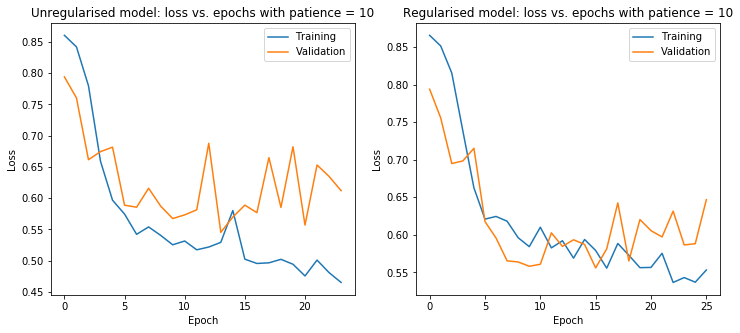

In [75]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_hist.history['loss'])
plt.plot(unreg_hist.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs with patience = 10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_hist.history['loss'])
plt.plot(reg_hist.history['val_loss'])
plt.title('Regularised model: loss vs. epochs with patience = 10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

There is overfitting in the validation set after 8 for unreg and 20 for reg; hence, reduce the patience a bit to 2

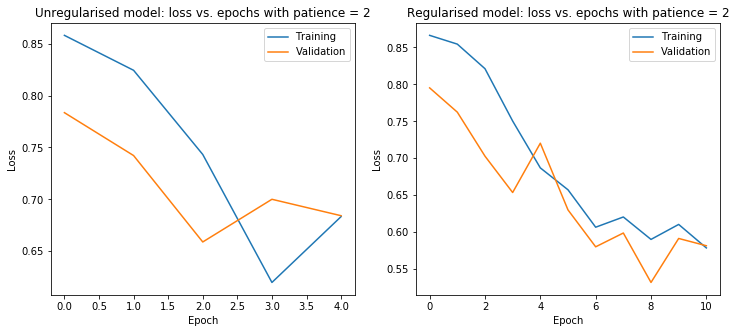

In [70]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_hist.history['loss'])
plt.plot(unreg_hist.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs with patience = 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_hist.history['loss'])
plt.plot(reg_hist.history['val_loss'])
plt.title('Regularised model: loss vs. epochs with patience = 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()